In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from matplotlib import animation
from grid_world import WindyGridworld

## Sarsa (on-policy TD control) for Windy Gridworld Environment

In [2]:
env = WindyGridworld()

In [3]:
def epsilon_greedy_policy(q_values, obs):
    if np.random.random() < eps:
        act = np.random.randint(0, 4)
    else:
        act = np.argmax(q_values[tuple(obs)])
    return act

In [4]:
q_values = np.zeros(env.world.shape + (4, ))
step_size = 0.5
eps = 0.1
gamma = 1  # Undiscounted
q_values = np.zeros(env.world.shape + (4, ))

episode_num = 1000
for _ in tqdm(range(episode_num)):
    obs = env.reset()
    act = epsilon_greedy_policy(q_values, obs)
    while True:
        next_obs, reward, done, _ = env.step(act)
        next_act = epsilon_greedy_policy(q_values, next_obs)
        cur_sa_value = q_values[tuple(obs)][act]
        next_sa_value = q_values[tuple(next_obs)][next_act]
        q_values[tuple(obs)][act] = cur_sa_value + step_size * (reward + gamma * next_sa_value - cur_sa_value)
        if done:
            break
        else:
            obs = next_obs
            act = next_act

100%|██████████| 1000/1000 [00:01<00:00, 745.47it/s]


In [5]:
obs = env.reset()
traj = [obs]
for i in range(20):
    act = np.argmax(q_values[tuple(obs)])
    next_obs, reward, done, _ = env.step(act)
    traj.append(next_obs)
    if done:
        break
    else:
        obs = next_obs

<IPython.core.display.Javascript object>


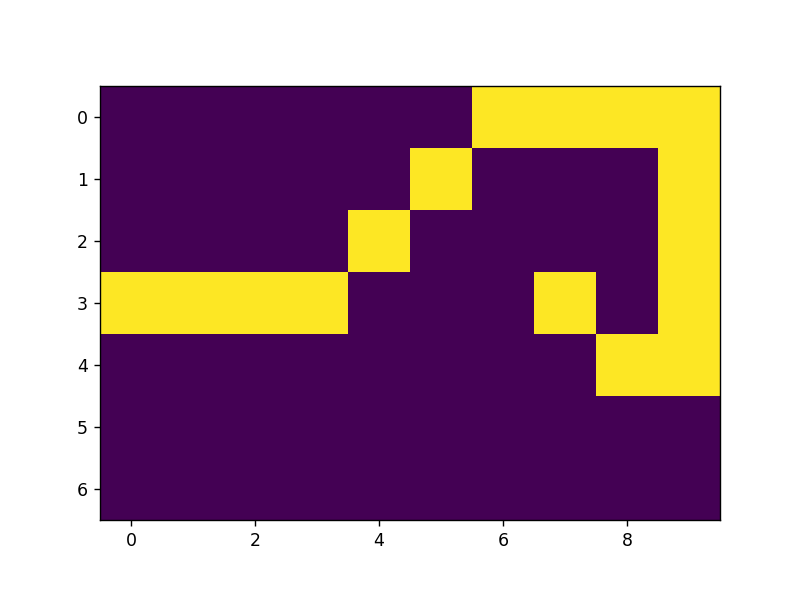

In [7]:
%matplotlib notebook
world = np.zeros(env.world.shape)
world[(3, 0)] = 1
world[(3, 7)] = 2

def _animate(i):
    x, y = traj[i]
    world[x, y] = 3
    img.set_data(world)
    return img

def _init():
    img.set_data(world)
    return img

fig, ax = plt.subplots()
img = ax.imshow(world)
ani = animation.FuncAnimation(fig=fig,
                              func=_animate,
                              frames=len(traj),
                              init_func=_init,
                              interval=80,
                              blit=False)

plt.show()